In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ev_data.csv')
df.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2
1,27,Ahmedabad,None,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4


In [3]:
data = pd.read_csv('ev_data.csv')
data.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2
1,27,Ahmedabad,None,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4


In [4]:
data["city"] = data["city"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
data["city"] = data["city"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
data["city"] = data["city"].replace({"Banglore ":"Bengaluru"})
data["city"] = data["city"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
data["city"] = data["city"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
data["city"] =data["city"].replace({"nashik":"Nashik"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    object 
 2   profession               990 non-null    object 
 3   marital_stat             990 non-null    object 
 4   education                990 non-null    object 
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    object 
 8   preferred_ev_type        990 non-null    object 
 9   think_ev_are_economical  990 non-null    object 
 10  preferred_brand          990 non-null    object 
 11  preferred_price_range    990 non-null    object 
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 100.7+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    object 
 2   profession               990 non-null    object 
 3   marital_stat             990 non-null    object 
 4   education                990 non-null    object 
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    object 
 8   preferred_ev_type        990 non-null    object 
 9   think_ev_are_economical  990 non-null    object 
 10  preferred_brand          990 non-null    object 
 11  preferred_price_range    990 non-null    object 
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 100.7+ KB


In [7]:
df.describe(include=object)

,city,profession,marital_stat,education,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range
count,990,990,990,990,990,990,990,990,990
unique,35,4,2,2,3,5,3,16,8
top,Pune,None,Single,Graduate,Yes,SUV,Yes,Tata,<15 lakhs
freq,565,455,631,685,655,462,760,184,479


In [8]:
df.describe(include=float)

,annual_income
count,9.900000e+02
mean,2.261180e+06
std,1.001444e+06
min,-3.761509e+05
25%,1.794900e+06
50%,2.329246e+06
75%,2.758737e+06
max,1.282128e+07


# Univariate Analysis

In [9]:
df['preferred_price_range'] = df['preferred_price_range'].replace({'<15 lakhs' : '15','<5 lakhs' : '5','<25 lakhs' : '25','>25 lakhs' : '30','1200000' : '12','2000000' : '20','1500000' : '15','700000' : '7'})
df.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,5,2
1,27,Ahmedabad,None,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,15,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,5,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,25,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,15,4


In [10]:
df["city"] = df["city"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["city"] = df["city"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["city"] = df["city"].replace({"Banglore ":"Bengaluru"})
df["city"] = df["city"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["city"] = df["city"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["city"] = df["city"].replace({"nashik":"Nashik"})

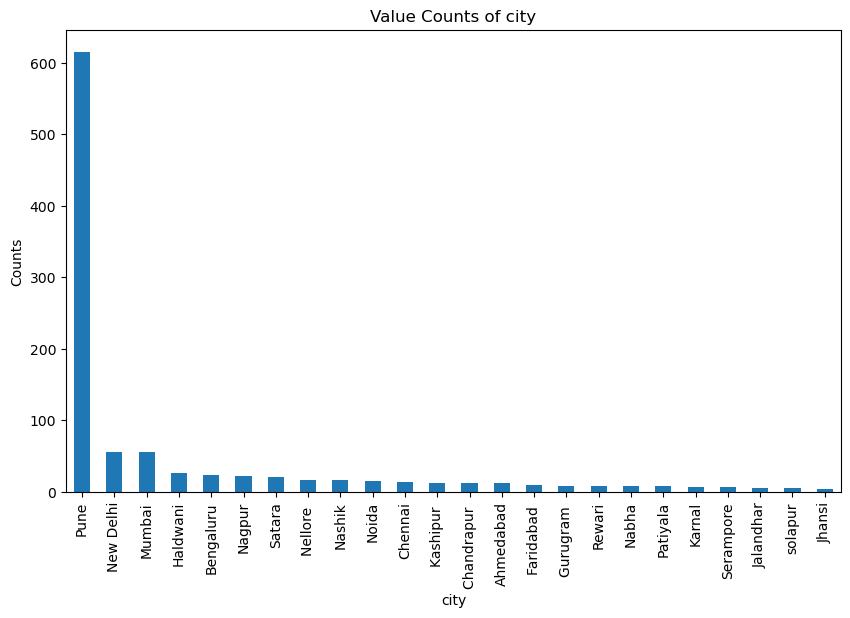

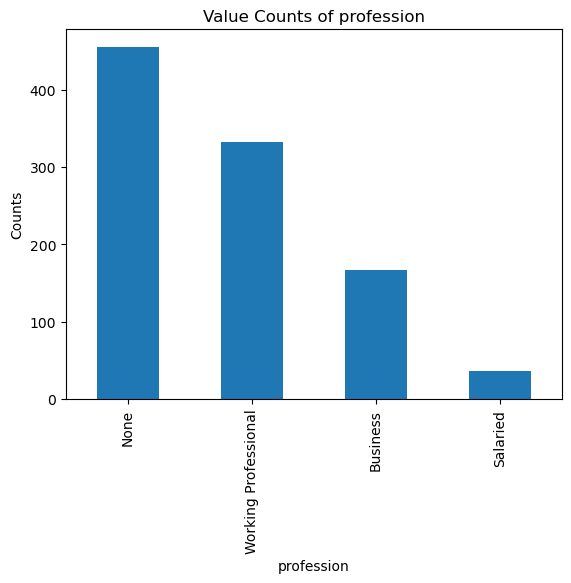

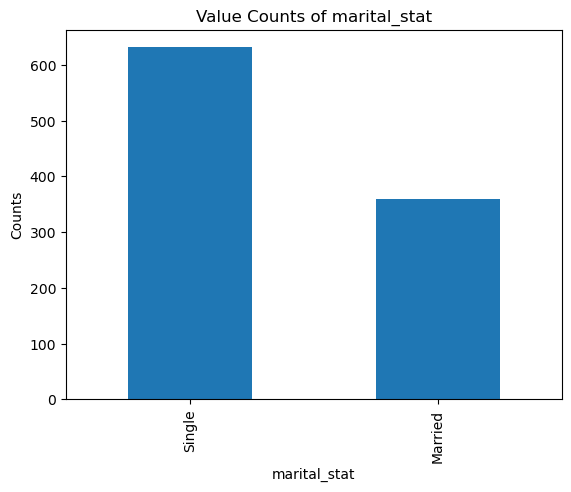

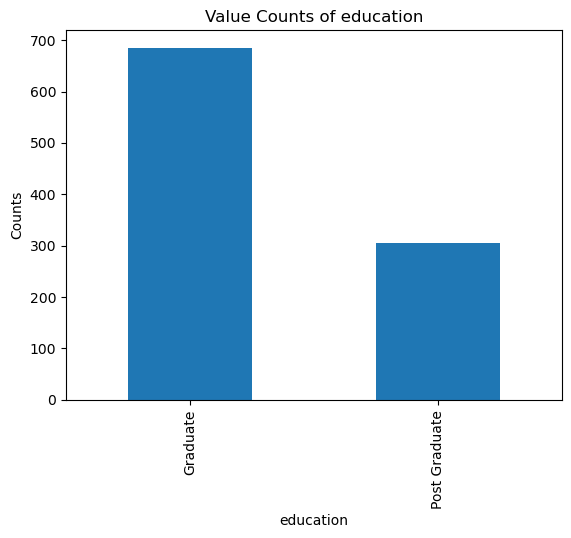

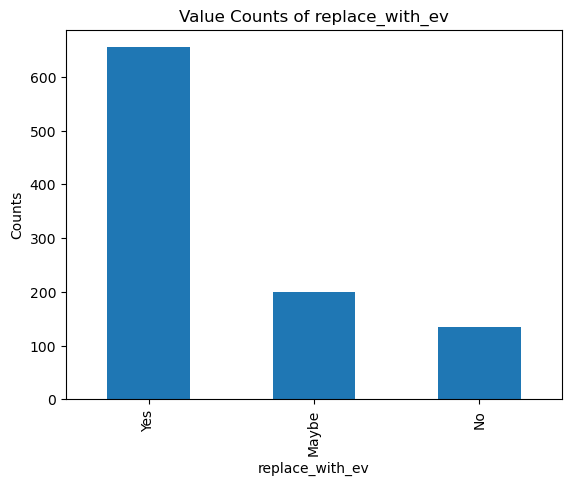

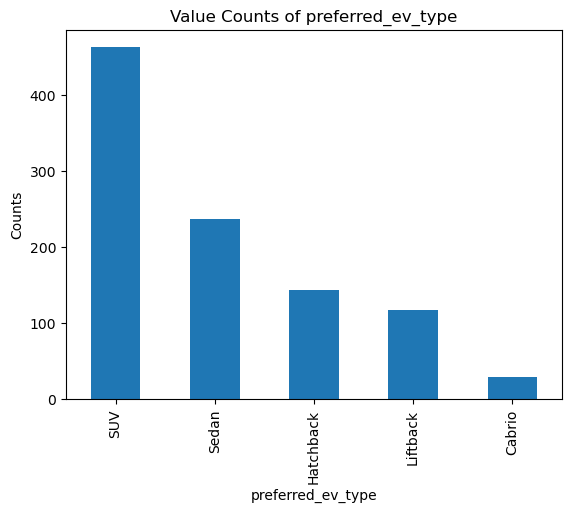

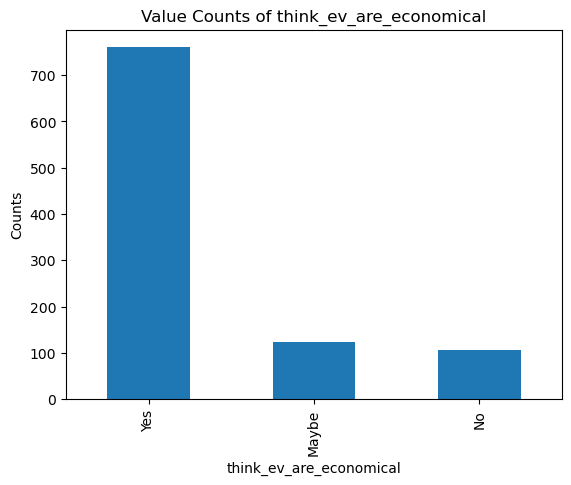

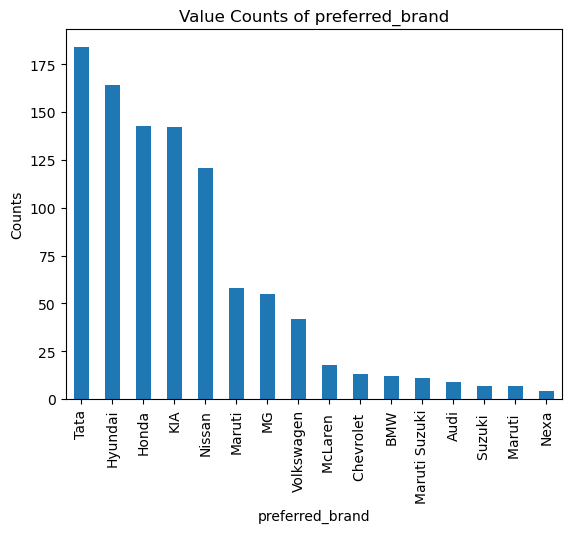

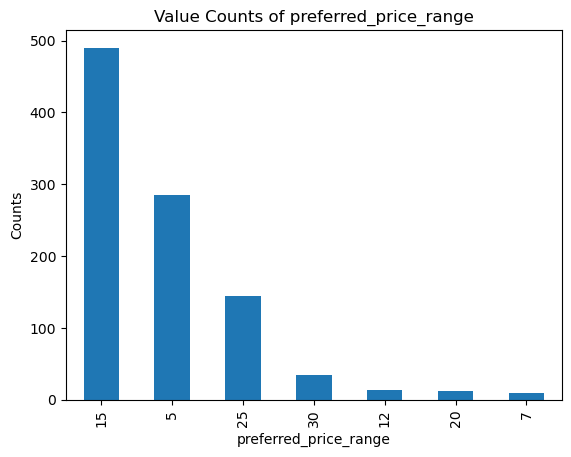

In [11]:
plt.figure(figsize=(10, 6))
for i in df.select_dtypes(include='object').columns:
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {i}')
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.show()


In [12]:
df.shape

(990, 13)

<Axes: ylabel='Density'>

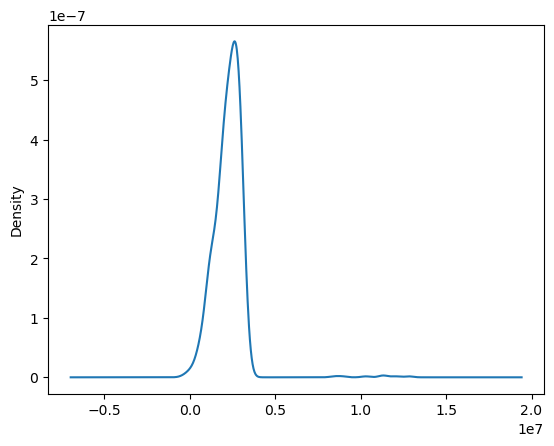

In [13]:
df["annual_income"].plot(kind="kde")

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df['city'] = le.fit_transform(df['city'].astype(str))
df['education'] = le.fit_transform(df['education'].astype(str))
df['marital_stat'] = le.fit_transform(df['marital_stat'].astype(str))
df['replace_with_ev'] = le.fit_transform(df['replace_with_ev'].astype(str))
df['preferred_ev_type'] = le.fit_transform(df['preferred_ev_type'].astype(str))
df['preferred_brand'] = le.fit_transform(df['preferred_brand'].astype(str))
df['preferred_price_range'] = le.fit_transform(df['preferred_price_range'].astype(str))
df['think_ev_are_economical'] = le.fit_transform(df['think_ev_are_economical'].astype(str))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    int32  
 2   profession               990 non-null    object 
 3   marital_stat             990 non-null    int32  
 4   education                990 non-null    int32  
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    int32  
 8   preferred_ev_type        990 non-null    int32  
 9   think_ev_are_economical  990 non-null    int32  
 10  preferred_brand          990 non-null    int32  
 11  preferred_price_range    990 non-null    int32  
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int32(8), int64(3), object(1)
memory usage: 69.7+ KB


In [17]:
df['think_ev_are_economical'] = le.fit_transform(df['think_ev_are_economical'].astype(str))

In [18]:
df.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,16,Working Professional,1,1,4,1.770466e+06,2,3,2,6,5,2
1,27,0,None,1,1,4,7.600731e+05,2,3,2,12,1,4
2,28,19,Working Professional,1,1,4,2.779701e+06,0,4,2,3,5,4
3,26,19,Salaried,1,1,4,1.473698e+06,2,4,2,14,3,2
4,25,19,Working Professional,1,1,4,2.430643e+06,2,4,2,4,1,4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    int32  
 2   profession               990 non-null    object 
 3   marital_stat             990 non-null    int32  
 4   education                990 non-null    int32  
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    int32  
 8   preferred_ev_type        990 non-null    int32  
 9   think_ev_are_economical  990 non-null    int32  
 10  preferred_brand          990 non-null    int32  
 11  preferred_price_range    990 non-null    int32  
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int32(8), int64(3), object(1)
memory usage: 69.7+ KB


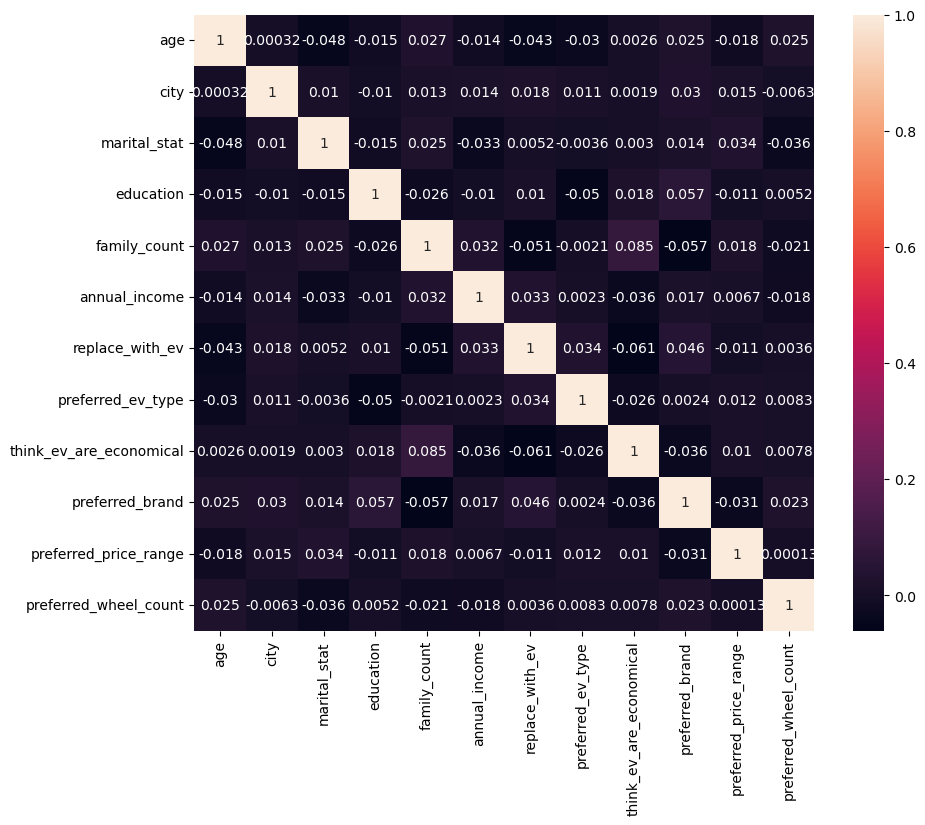

In [20]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [21]:
df= df.drop(['profession', 'education', 'think_ev_are_economical', 'family_count'], axis = 1)
df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,16,1,1.770466e+06,2,3,6,5,2
1,27,0,1,7.600731e+05,2,3,12,1,4
2,28,19,1,2.779701e+06,0,4,3,5,4
3,26,19,1,1.473698e+06,2,4,14,3,2
4,25,19,1,2.430643e+06,2,4,4,1,4


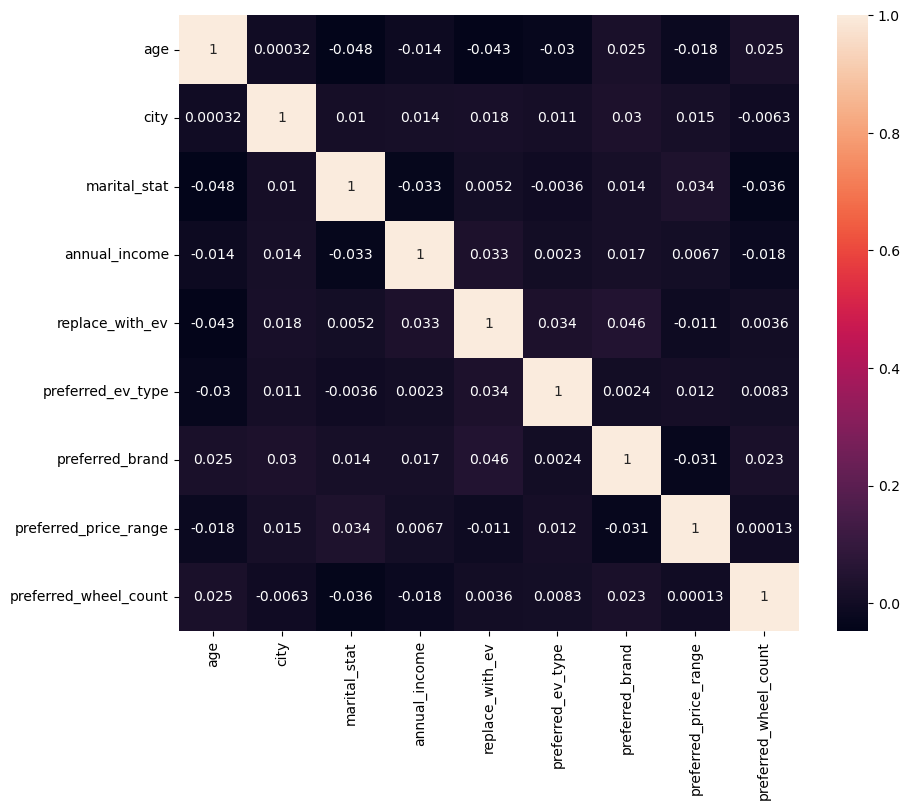

In [22]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [23]:
df= df.drop(["preferred_wheel_count"], axis = 1)
df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range
0,30,16,1,1.770466e+06,2,3,6,5
1,27,0,1,7.600731e+05,2,3,12,1
2,28,19,1,2.779701e+06,0,4,3,5
3,26,19,1,1.473698e+06,2,4,14,3
4,25,19,1,2.430643e+06,2,4,4,1


In [24]:
df.shape

(990, 8)

In [25]:
df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range
0,30,16,1,1.770466e+06,2,3,6,5
1,27,0,1,7.600731e+05,2,3,12,1
2,28,19,1,2.779701e+06,0,4,3,5
3,26,19,1,1.473698e+06,2,4,14,3
4,25,19,1,2.430643e+06,2,4,4,1


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
df_scaled = scaler.fit_transform(df)
df1 = pd.DataFrame(df_scaled, columns = df.columns)
df1.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range
0,-0.159835,-0.018039,0.75428,-0.490254,0.669051,0.242489,-0.392423,1.337083
1,-0.425929,-3.025745,0.75428,-1.499700,0.669051,0.242489,0.934267,-0.887643
2,-0.337231,0.545906,0.75428,0.518035,-1.807062,1.180238,-1.055768,1.337083
3,-0.514627,0.545906,0.75428,-0.786744,0.669051,1.180238,1.376497,0.224720
4,-0.603325,0.545906,0.75428,0.169305,0.669051,1.180238,-0.834653,-0.887643


In [28]:

from sklearn.cluster import KMeans
wcss  = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

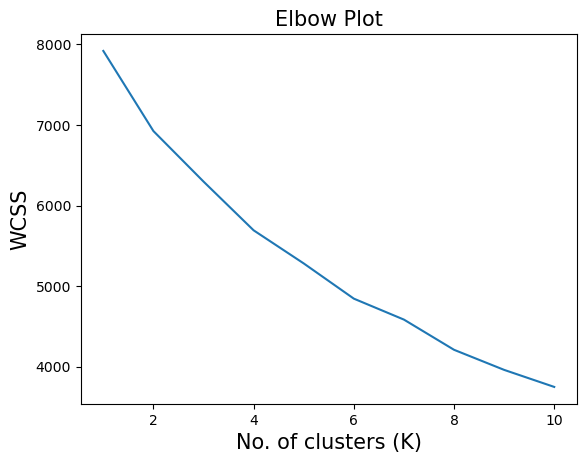

In [29]:
plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

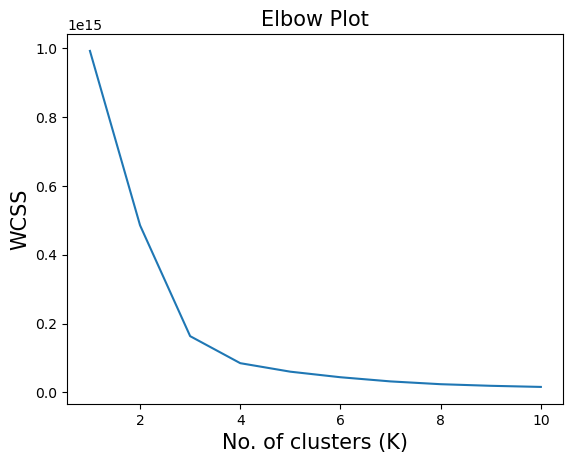

In [30]:
wcss  = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [31]:
cov_mat = np.cov(df1.T)

In [32]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [33]:
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[1.1040728989752637, 1.0787268749679293, 1.0270860324417497, 1.0105530327740924, 0.9897859883106479, 0.9582668730855294, 0.9343046237068463, 0.9052926545043836]


In [34]:
percent_var = []

for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)

percent_var

[13.786970922809774,
 13.470465648273745,
 12.825607147536475,
 12.619153401686564,
 12.359827556050874,
 11.966236584363473,
 11.667011020783708,
 11.304727718495378]

In [35]:
np.cumsum(percent_var)

array([ 13.78697092,  27.25743657,  40.08304372,  52.70219712,
        65.06202468,  77.02826126,  88.69527228, 100.        ])

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

In [37]:
df2 = pca.fit_transform(df1)
df2.shape

(990, 4)

In [38]:
pca_df = pd.DataFrame(data = df2, columns = ['PCA1', 'PCA2','PCA3',"PCA4"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-0.629857,-1.271448,-0.212179,0.289324
1,0.297436,-0.362452,-0.403817,-3.333202
2,0.126463,-1.894831,0.525005,1.479674
3,-1.622502,-0.140057,-1.101937,-0.458962
4,-1.145057,-0.402421,0.379229,-0.637113


In [90]:
pca_df1=pd.concat([pca_df, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
pca_df1.head()

,PCA1,PCA2,PCA3,PCA4,Cluster
0,-0.629857,-1.271448,-0.212179,0.289324,1
1,0.297436,-0.362452,-0.403817,-3.333202,3
2,0.126463,-1.894831,0.525005,1.479674,1
3,-1.622502,-0.140057,-1.101937,-0.458962,0
4,-1.145057,-0.402421,0.379229,-0.637113,0


In [91]:
X=pca_df1.drop("Cluster",axis=1)
y=pca_df1["Cluster"]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_train_dt = dt_classifier.predict(X_train)
print(classification_report(y_train, y_pred_train_dt))
y_pred_dt = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       131

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        64
           1       0.91      0.89      0.90        54
           2       0.85      0.85      0.85        46
           3       0.80      0.82      0.81        34

    accuracy                           0.86       198
   macro avg       0.86      0.86      0.86       198
weighted avg       0.86      0.86      0.86       198



In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_train_rf = rf_classifier.predict(X_train)
print(classification_report(y_train, y_pred_train_rf))
y_pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       131

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        64
           1       0.88      0.96      0.92        54
           2       0.92      0.96      0.94        46
           3       0.89      0.94      0.91        34

    accuracy                           0.92       198
   macro avg       0.92      0.93      0.92       198
weighted avg       0.93      0.92      0.92       198



In [95]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_train_adaboost = adaboost_classifier.predict(X_train)
print(classification_report(y_train, y_pred_train_adaboost))
y_pred_adaboost = adaboost_classifier.predict(X_test)
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.51      0.39      0.44       256
           1       0.68      0.70      0.69       243
           2       0.76      0.56      0.65       162
           3       0.46      0.81      0.58       131

    accuracy                           0.59       792
   macro avg       0.60      0.61      0.59       792
weighted avg       0.61      0.59      0.58       792

              precision    recall  f1-score   support

           0       0.48      0.36      0.41        64
           1       0.60      0.63      0.61        54
           2       0.82      0.67      0.74        46
           3       0.42      0.68      0.52        34

    accuracy                           0.56       198
   macro avg       0.58      0.58      0.57       198
weighted avg       0.58      0.56      0.56       198



PCA Model works better with AdaBoost with accuracy of 88 and 86 on train and test data respectively

In [39]:
model = KMeans(4)
model.fit_predict(df2)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': model.labels_})], axis = 1)

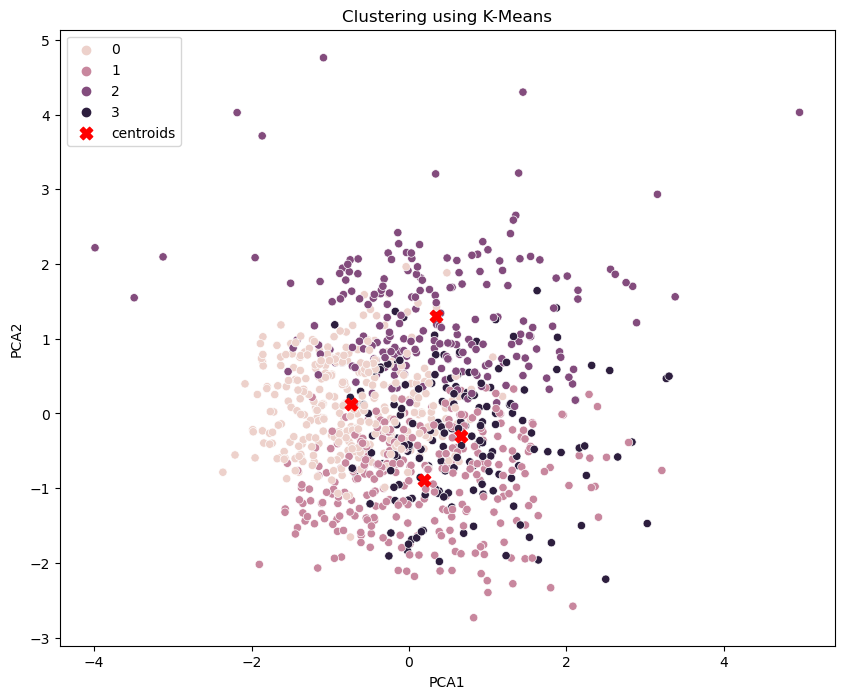

In [40]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

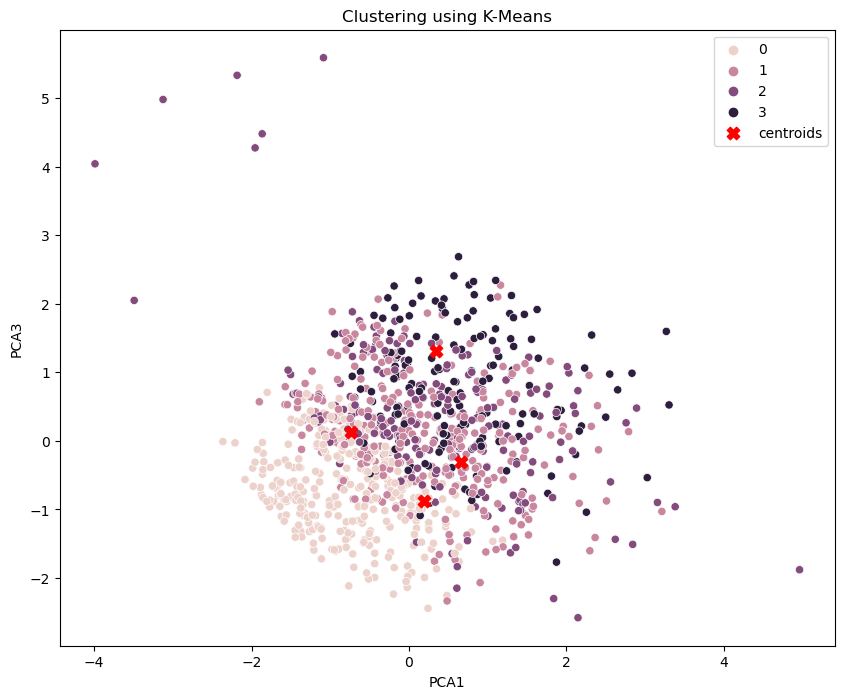

In [41]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PCA1', y = 'PCA3', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

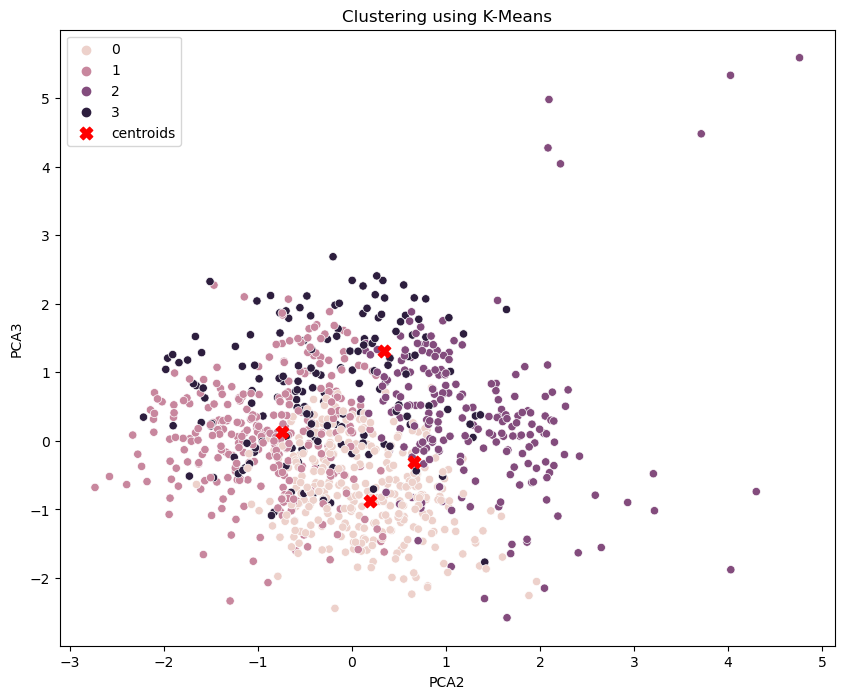

In [42]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PCA2', y = 'PCA3', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

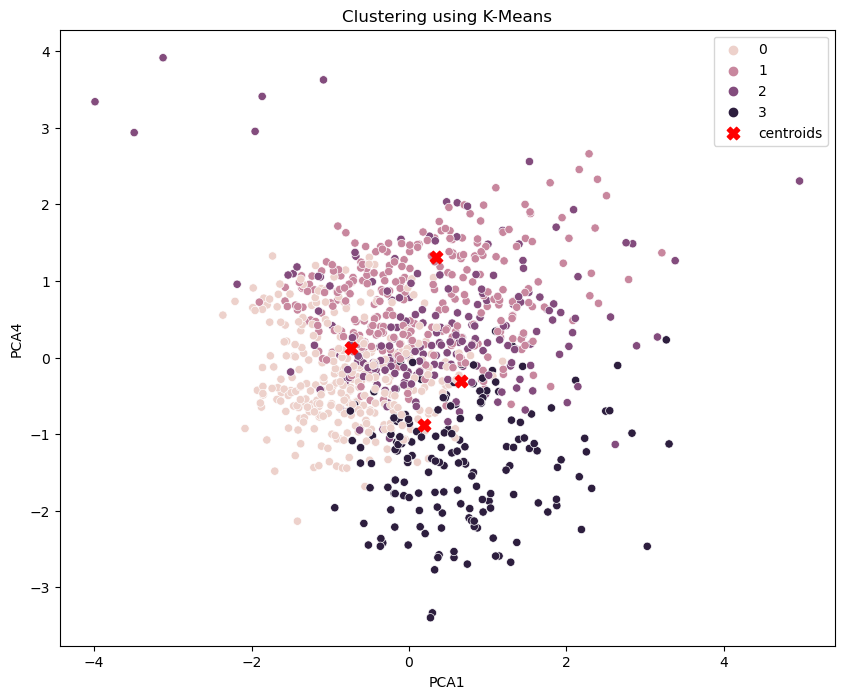

In [43]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PCA1', y = 'PCA4', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

In [44]:
new_df = pd.concat([df1, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
new_df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,Cluster
0,-0.159835,-0.018039,0.75428,-0.490254,0.669051,0.242489,-0.392423,1.337083,1
1,-0.425929,-3.025745,0.75428,-1.499700,0.669051,0.242489,0.934267,-0.887643,3
2,-0.337231,0.545906,0.75428,0.518035,-1.807062,1.180238,-1.055768,1.337083,1
3,-0.514627,0.545906,0.75428,-0.786744,0.669051,1.180238,1.376497,0.224720,0
4,-0.603325,0.545906,0.75428,0.169305,0.669051,1.180238,-0.834653,-0.887643,0


In [45]:
df_0 = new_df[new_df['Cluster'] == 0]
df_1 = new_df[new_df['Cluster'] == 1]
df_2 = new_df[new_df['Cluster'] == 2]
df_3 = new_df[new_df['Cluster'] == 3]

In [46]:
cluster_count = new_df['Cluster'].value_counts()
cluster_count

0    320
1    297
2    208
3    165
Name: Cluster, dtype: int64

<Axes: xlabel='Cluster', ylabel='count'>

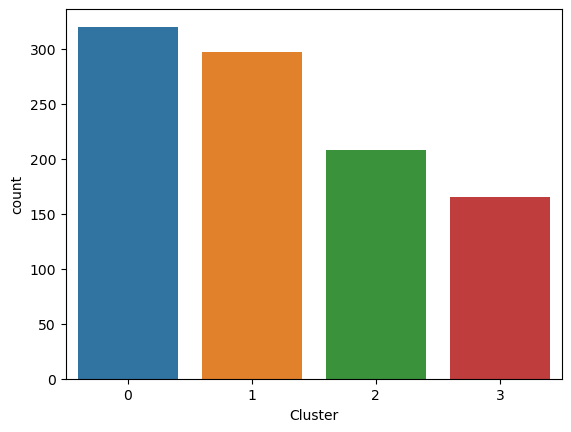

In [47]:
sns.countplot(x = 'Cluster', data = new_df)

In [48]:
new_df.head()

,age,city,marital_stat,annual_income,replace_with_ev,preferred_ev_type,preferred_brand,preferred_price_range,Cluster
0,-0.159835,-0.018039,0.75428,-0.490254,0.669051,0.242489,-0.392423,1.337083,1
1,-0.425929,-3.025745,0.75428,-1.499700,0.669051,0.242489,0.934267,-0.887643,3
2,-0.337231,0.545906,0.75428,0.518035,-1.807062,1.180238,-1.055768,1.337083,1
3,-0.514627,0.545906,0.75428,-0.786744,0.669051,1.180238,1.376497,0.224720,0
4,-0.603325,0.545906,0.75428,0.169305,0.669051,1.180238,-0.834653,-0.887643,0


In [49]:
df_final = pd.concat([data, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
df_final.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count,Cluster
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2,1
1,27,Ahmedabad,None,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4,3
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4,1
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2,0
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4,0


In [50]:
c_0 = df_final[df_final['Cluster'] == 0]
c_1 = df_final[df_final['Cluster'] == 1]
c_2 = df_final[df_final['Cluster'] == 2]
c_3 = df_final[df_final['Cluster'] == 3]

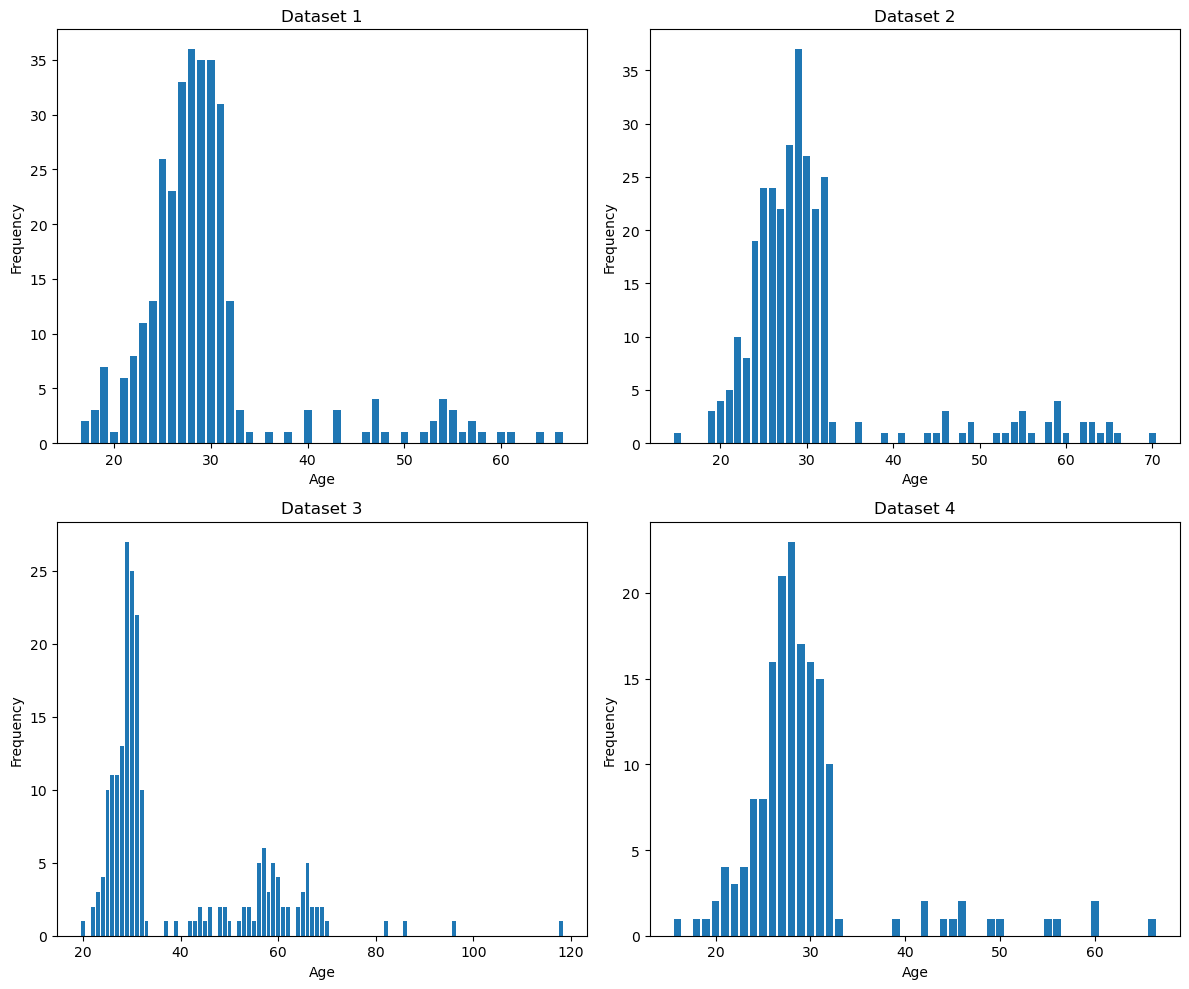

In [51]:
datasets = [c_0, c_1, c_2, c_3]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, dataset in enumerate(datasets):

    row = i // 2
    col = i % 2
    ax = axs[row, col]  
    age_counts = dataset['age'].value_counts()

    ax.bar(age_counts.index, age_counts.values)

    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset {i+1}')


plt.tight_layout()

plt.show()

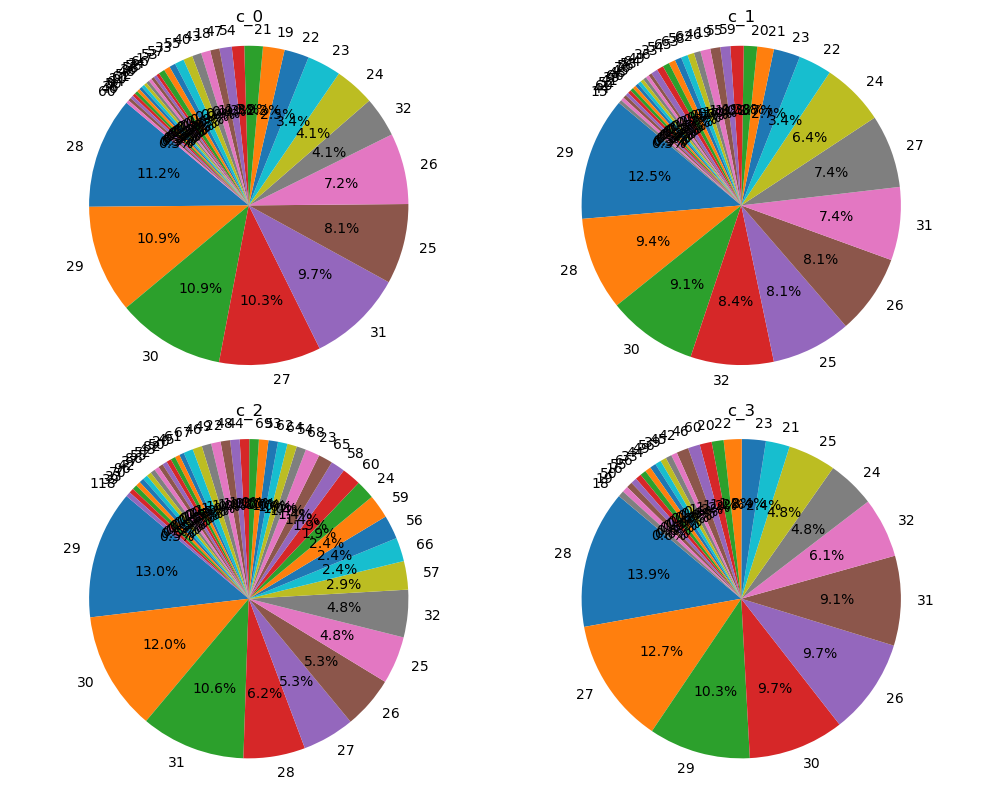

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]  
    
    top_ages = dataset['age'].value_counts()
    
    ax.pie(top_ages.values, labels=top_ages.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  
    ax.set_title(f'c_{i}')  
plt.tight_layout()

# Display the plots
plt.show()


In [53]:
#The people who prefer EV are mostly of age between 25 to 30.

In [54]:
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    city_counts = dataset['city'].value_counts()
    ax.bar(city_counts.index, city_counts.values)
    ax.set_xlabel('City')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset c_{i}')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [55]:
#People in Pune followed by Mumbai are interested in EV.

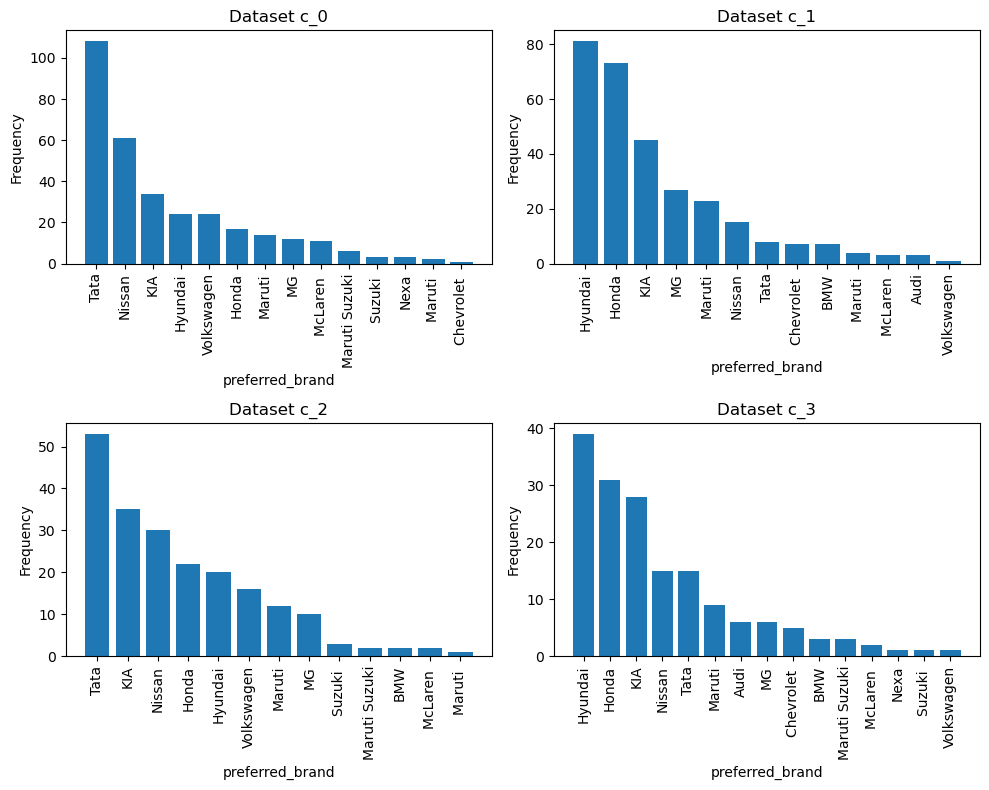

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    city_counts = dataset['preferred_brand'].value_counts()
    ax.bar(city_counts.index, city_counts.values)
    ax.set_xlabel('preferred_brand')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset c_{i}')
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [57]:
#Kia,Hyundai,Honda & Tata are the Ev Brands which people prefer the most

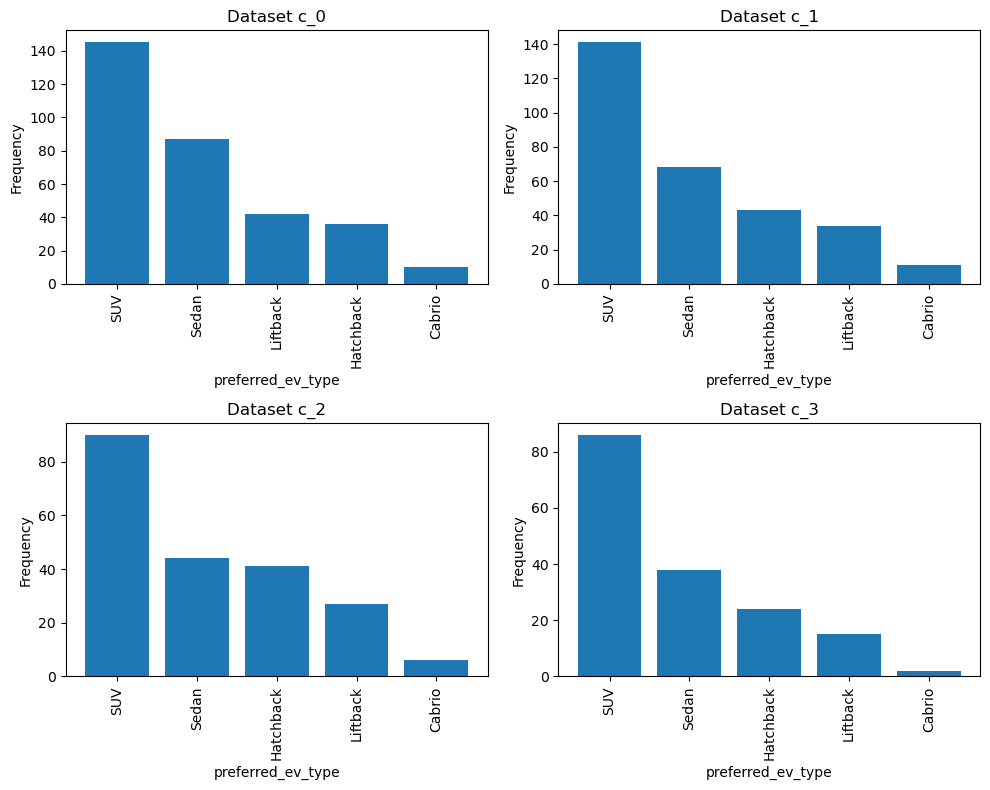

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    city_counts = dataset['preferred_ev_type'].value_counts()
    ax.bar(city_counts.index, city_counts.values)
    ax.set_xlabel('preferred_ev_type')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset c_{i}')
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [59]:
#Amongst all of the EV types SUV is the most famous type followed by sedan

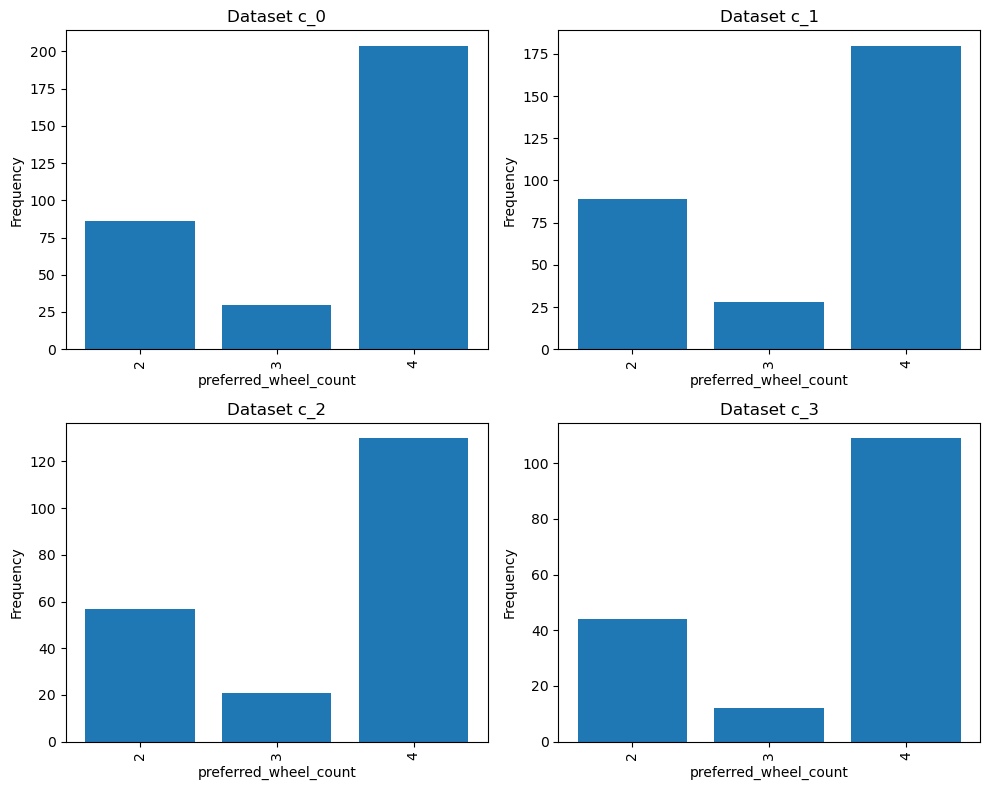

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    city_counts = dataset['preferred_wheel_count'].value_counts()
    ax.bar(city_counts.index, city_counts.values)
    ax.set_xlabel('preferred_wheel_count')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset c_{i}')
    ax.tick_params(axis='x', rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

In [61]:
#Amongst the people who prefer EV, majority of the population buys four wheeler

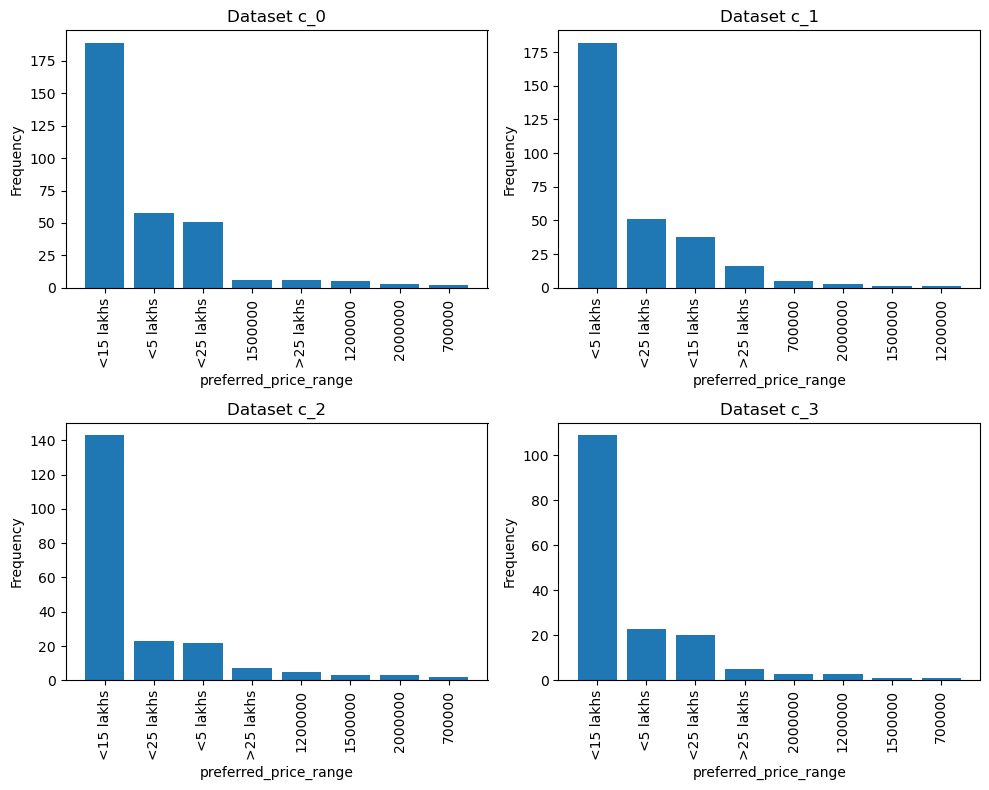

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    city_counts = dataset['preferred_price_range'].value_counts()
    ax.bar(city_counts.index, city_counts.values)
    ax.set_xlabel('preferred_price_range')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset c_{i}')
    ax.tick_params(axis='x', rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

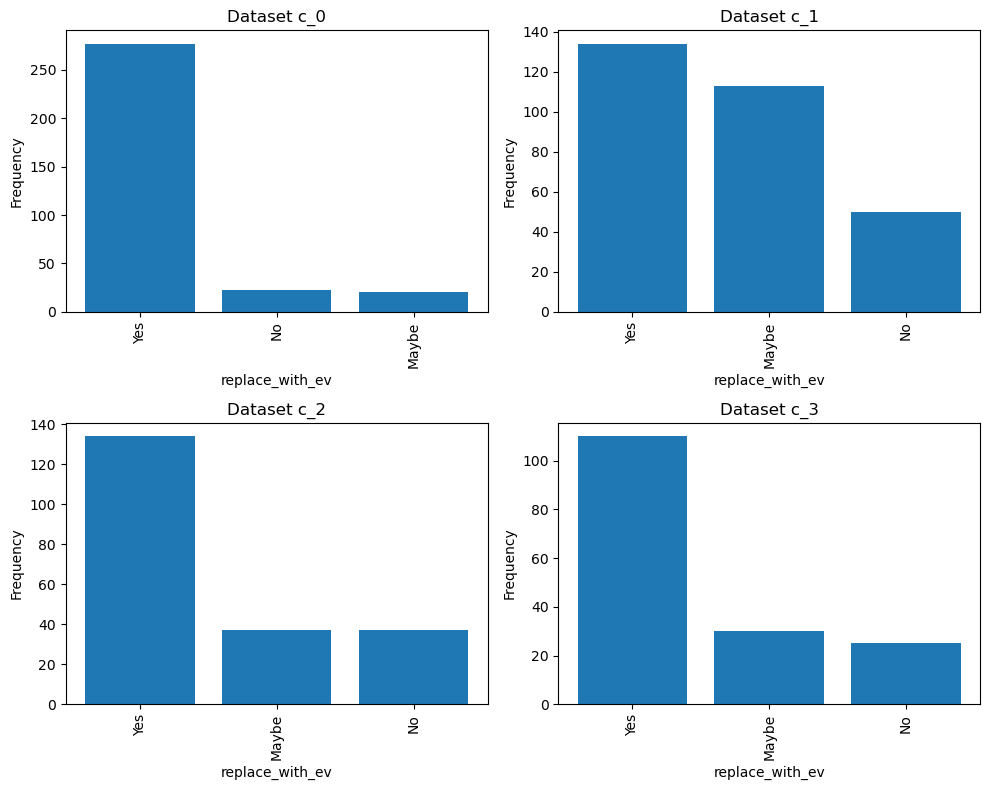

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    city_counts = dataset['replace_with_ev'].value_counts()
    ax.bar(city_counts.index, city_counts.values)
    ax.set_xlabel('replace_with_ev')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset c_{i}')
    ax.tick_params(axis='x', rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

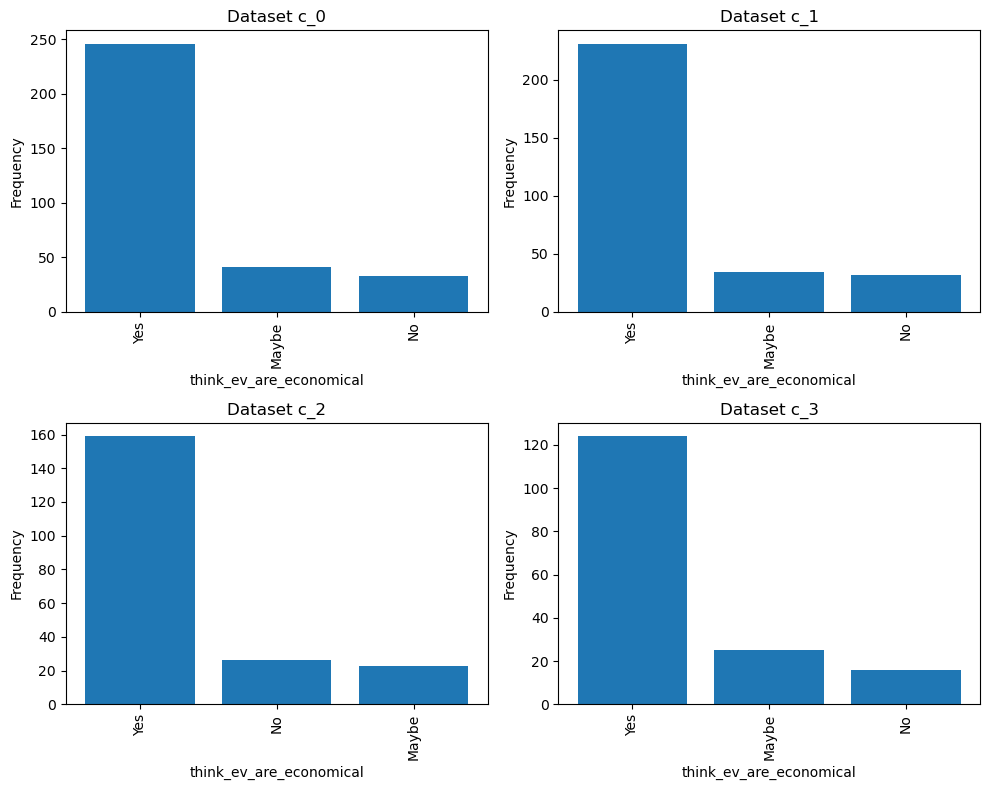

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    city_counts = dataset['think_ev_are_economical'].value_counts()
    ax.bar(city_counts.index, city_counts.values)
    ax.set_xlabel('think_ev_are_economical')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dataset c_{i}')
    ax.tick_params(axis='x', rotation=90)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

In [65]:
#The budget for buying EV is <15 lakhs for majority people
